In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np


In [2]:
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [3]:
%matplotlib inline
plt.style.use('seaborn-darkgrid')


In [4]:
# yahoo finance is used to fetch data
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
Df = yf.download('GLD', '2020-01-01', '2021-03-03', auto_adjust=True)


In [ ]:
# Only keep close columns
Df = Df[['Close']]

In [ ]:
# Drop rows with missing values
Df = Df.dropna()

In [ ]:
# Plot the closing price of GLD
Df.Close.plot(figsize=(20, 5),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [9]:
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

In [10]:
Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

In [11]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

In [12]:
# Train dataset
X_train = X[:t]
y_train = y[:t]

In [13]:
# Test dataset
X_test = X[t:]
y_test = y[t:]

In [14]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.03 * 3 Days Moving Average (x1) + -0.05 * 9 Days Moving Average (x2) + 4.53 (constant)


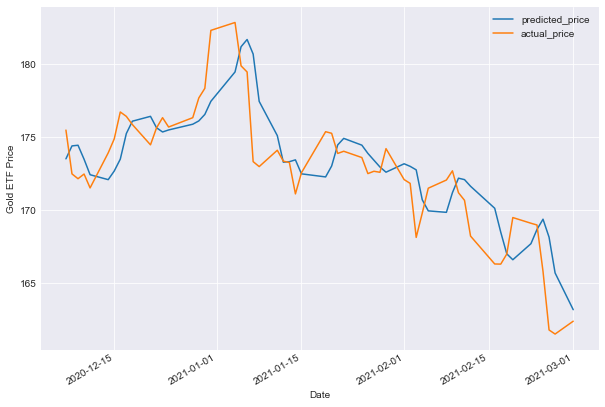

In [15]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [16]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

68.73

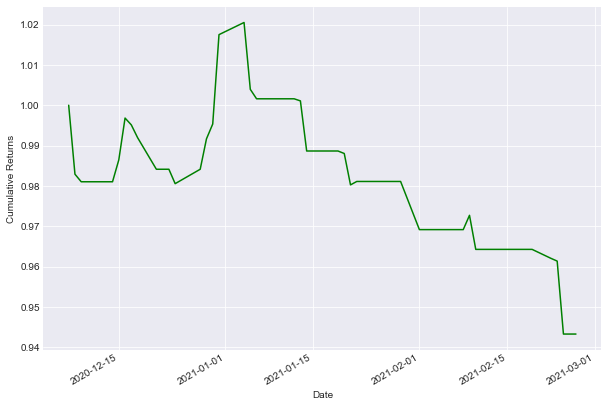

In [17]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()